# Sorting the HO eigenvalues

The eigenvalues of a 2D harmonic oscillator under the influence of a B-field is given by
$$
\epsilon_{nm} = \hbar \Omega (2n + |m| + 1) - \frac{\hbar\omega_c}{2} m
$$
Importantly,
$\Omega^2 = \omega_0^2 + \omega_c^2/4$
We are teenagers, so setting $\omega_0 = \hbar = 1$, while $\omega_c$ is dependent on the B-field. 

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [15]:
def energy_mn(n, m, omega_c):
    omega = np.sqrt(1 + omega_c*omega_c/4)
    return omega*(2*n + abs(m) + 1) - (omega_c * m)/2

In [27]:
# Try to reproduce spaghetti plot
omega_c = np.linspace(0, 4, 101)
n = [0, 1, 2]
m = np.arange(-3, 4)

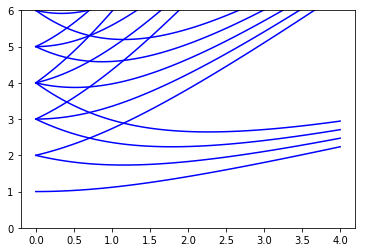

In [28]:
plt.figure()
plt.ylim((0, 6))
for guy in n:
    for buddy in m:
        energy = energy_mn(guy, buddy, omega_c)
        plt.plot(omega_c, energy, "b")
plt.show()

In [50]:
omega_c = 0
df = pd.DataFrame()#(np.zeros((len(n)+len(m), 3)), columns=["n","m", "E"])
i = 0
for guy in n:
    for buddy in m:
        df.loc[i, "n"] = guy
        df.loc[i, "m"] = buddy
        df.loc[i, "E"] = energy_mn(guy, buddy, omega_c)
        i += 1

In [54]:
df.sort_values("E").reset_index()

,index,n,m,E
0,3,0.0,0.0,1.0
1,2,0.0,-1.0,2.0
2,4,0.0,1.0,2.0
3,10,1.0,0.0,3.0
4,1,0.0,-2.0,3.0
5,5,0.0,2.0,3.0
6,11,1.0,1.0,4.0
7,9,1.0,-1.0,4.0
8,0,0.0,-3.0,4.0
9,6,0.0,3.0,4.0
